# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [169]:
from __future__ import print_function, division
import pylab as pl
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
import urllib as urlib
from statsmodels.graphics.api import abline_plot

# s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)
os.environ["PUIDATA"] = "{}/Desktop/PUI/PUIDATA".format(os.getenv("HOME"))
puidata = os.getenv("PUIDATA")

np.random.seed(218)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Data Wrangling

#### CSV read in from local

In [100]:
# wfm = pd.read_csv(os.getenv('PUIDATA')+'/'+'World firearms murders and ownership - Sheet 1.csv') # Guardian firearms data

#### Extra Credit:
#### Downloading the file directly from google docs using google api format

In [101]:
#Guardian firearms data
wfm = pd.read_csv('https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/export?format=csv&gid=0',usecols=['Country/Territory','Average total all civilian firearms','Number of homicides by firearm'])
wfm.rename({'Country/Territory':'Country'},axis=1,inplace=True)
wfm.head(5) 

,Country,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [102]:
#Number of mass shootings
url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
urlib.request.urlretrieve(url, puidata + '/' + 'nms.csv')
nms = pd.read_csv(puidata + '/' + 'nms.csv',usecols=['Country','Guns per 100 inhabitants','Number of mass shootings (1983-2013)']) 
nms.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [103]:
#World Population
url = 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv'
filename = 'wp.zip'
urlib.request.urlretrieve(url, puidata+'/'+filename)
os.system('unzip ' + puidata + '/wp.zip -d ' + puidata + '/WP/')
pop = pd.read_csv(puidata + '/WP/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv',skiprows=[1,2,3],header=1,usecols=['Country Name','2012'])
pop.rename({'Country Name':'Country','2012':'pop'},axis=1,inplace=True)
pop.head()

,Country,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [104]:
#GDP
url = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'
filename = 'gdp.zip'
urlib.request.urlretrieve(url, puidata+'/'+filename)
os.system('unzip ' + puidata + '/gdp.zip -d ' + puidata + '/GDP/')
gdp = pd.read_csv(puidata + '/GDP/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv',skiprows=[1,2,3],header=1,usecols=['Country Name','2012'])
gdp.rename({'Country Name':'Country','2012':'gdp'},axis=1,inplace=True)
gdp.head()

,Country,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [105]:
gdp_pop = gdp.merge(pop, on='Country')
df_ = wfm.merge(nms,on='Country')

In [106]:
df_ = df_.merge(gdp_pop, on="Country")
df_.rename({'Number of mass shootings (1983-2013)':'Number of mass shootings'},axis=1,inplace=True)
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,gdp,pop
0,Australia,30.0,3050000.0,15.0,4,1.543411e+12,22742475.0
1,Austria,18.0,2500000.0,30.4,1,4.094252e+11,8429991.0
2,Belgium,70.0,1800000.0,17.2,2,4.978842e+11,11128246.0
3,Canada,173.0,9950000.0,30.8,4,1.824289e+12,34750545.0
4,Denmark,15.0,650000.0,12.0,0,3.271489e+11,5591572.0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


Number of mass shooting vs GDP in billions, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


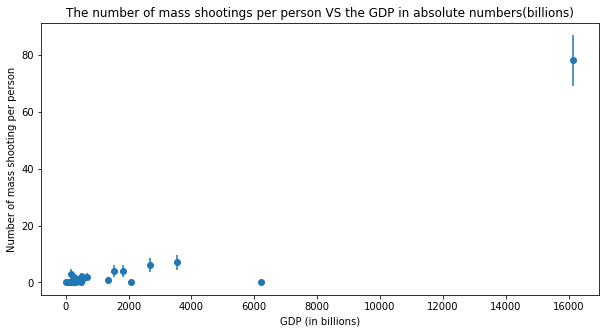

In [111]:
#GDP in whole numbers
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
plt.title('The number of mass shootings per person VS the GDP in absolute numbers(billions)')
print ("Number of mass shooting vs GDP in billions, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

#### Figure 1: The plot shows the number of mass shootings per person vs the GDP in absolute numbers which has been rescaled for the unit to now be billions. We have used Poission statistics for the same. The datapoint at the top right seems to be an outlier. 

Number of mass shooting vs GDP per person, errors represent Poisson statistics.
The datapoint to the top of the plot is the USA, which has the highest number of mass shootings per person and an average GDP per person


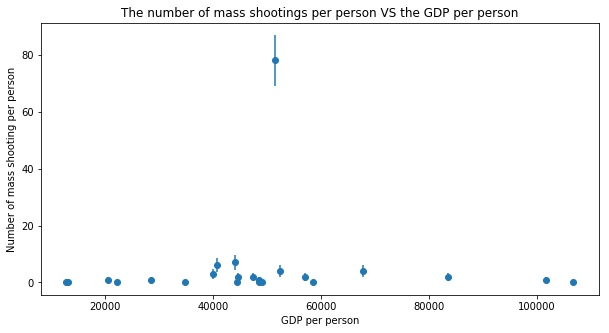

In [112]:
#GDP per person
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp /df_['pop'], df_['Number of mass shootings'])
ax.errorbar(df_.gdp /df_['pop'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
plt.title('The number of mass shootings per person VS the GDP per person')
print ("Number of mass shooting vs GDP per person, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top of the plot is the USA, " + 
       "which has the highest number of mass shootings per person and an average GDP per person")

#### Figure 2: The plot shows the number of mass shootings per person vs the GDP per person. We have used Poission statistics for the same. The datapoint at the top seems to be an outlier. 

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [109]:
df_['avg_civilian_firearms_pp'] = df_["Average total all civilian firearms"] / df_['pop'] 

Text(0.5,1,'The Average number of civilian firearms per person VS the GDP per person without errors')

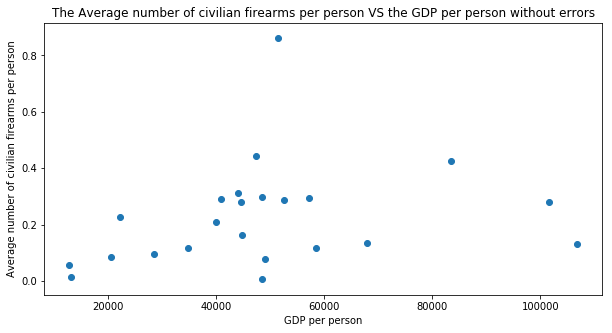

In [134]:
#Average number of civilian firearms per person without errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp/df_['pop'], df_['avg_civilian_firearms_pp'])
ax.set_xlabel("GDP per person")
ax.set_ylabel("Average number of civilian firearms per person")
ax.set_ylim()
plt.title('The Average number of civilian firearms per person VS the GDP per person without errors')

#### Figure 3: The plot shows the average number of civilian firearms per person vs the GDP per person but,without errors.  The datapoint at the top(USA) seems to be an outlier because it has an ususually high number of civilian firearms per person. 

Text(0.5,1,'Average number of civilian firearms per person VS the GDP per person with errors')

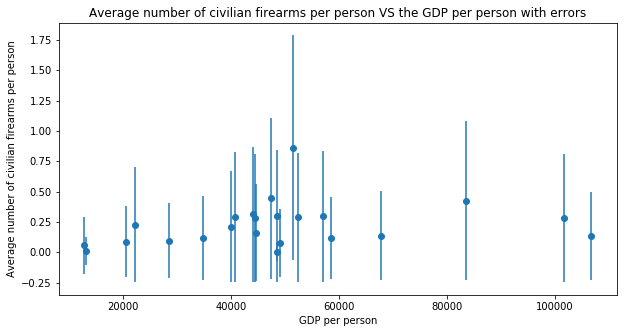

In [143]:
#Average number of civilian firearms per person with errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp/df_['pop'], df_['avg_civilian_firearms_pp'])
ax.errorbar(df_.gdp /df_['pop'], df_['avg_civilian_firearms_pp'], 
            yerr = np.sqrt(df_['avg_civilian_firearms_pp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Average number of civilian firearms per person")
ax.set_ylim()
plt.title('Average number of civilian firearms per person VS the GDP per person with errors')

#### Figure 4: The plot shows the average number of civilian firearms per person vs the GDP per person. Poisson statistics have been used for the same. The datapoint at the top(USA) seems to be an outlier because it has an ususually high number of civilian firearms per person and that increases the uncertainity associated with it. 

In [138]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0.5,1,'Average number of homicide by firearms per people')

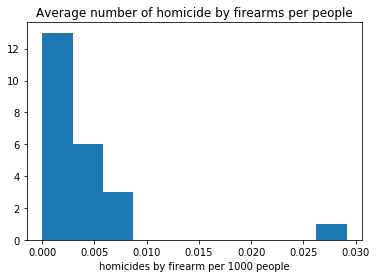

In [148]:
#Average number of homicide by firearms per 1000 people as a histogram
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');
plt.title('Average number of homicide by firearms per people')


#### Figure 5: The histogram shows the average number of homicides by firearms per 1000 people. It is seen that there is an outlier namely,USA for the same with the average significantly higher than any of the others.

Text(0.5,1,'Average number of homicide by firearms per 1000 people VS the GDP per person with errors')

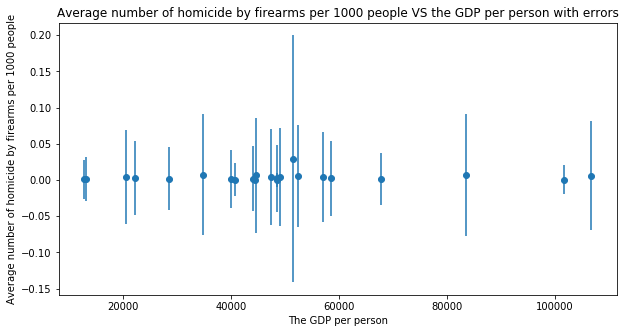

In [149]:
#Average number of homicides by firearms per person against the GDP per person with errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp/df_['pop'], df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.errorbar(df_.gdp /df_['pop'], df_['Number of homicides by firearm'] / df_['pop'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1000.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Average number of homicide by firearms per 1000 people")
ax.set_xlabel('The GDP per person')
ax.set_ylim()
plt.title('Average number of homicide by firearms per 1000 people VS the GDP per person with errors')

#### Figure 6: The histogram shows the average number of homicides by firearms per 1000 people. It is seen that there is an outlier namely,USA for the same with the average significantly higher than any of the others.

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [151]:
df_usa = df_[df_['Country'] == 'United States']
df_usa

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,gdp,pop,avg_civilian_firearms_pp,shootingspp
22,United States,9146.0,270000000.0,88.8,78,1.615526e+13,313993272.0,0.859891,0.000248


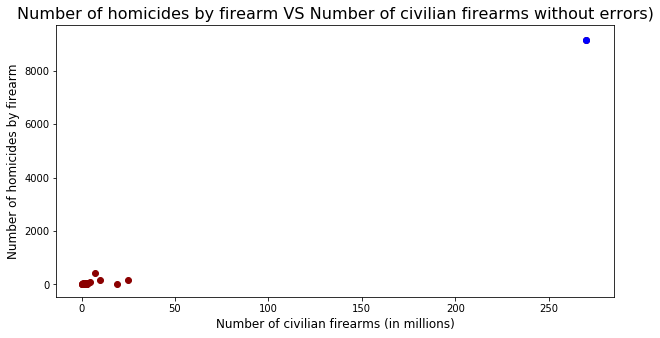

In [154]:
#plot with errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1000000, df_['Number of homicides by firearm'], c='darkred')


scatter_usa = ax.scatter(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of homicides by firearm'], c='b')


ax.set_xlabel("Number of civilian firearms (in millions)", fontsize=12)
ax.set_ylabel("Number of homicides by firearm", fontsize=12)
ax.set_ylim()
pl.title('Number of homicides by firearm VS Number of civilian firearms without errors)', fontsize=16)
pl.show()

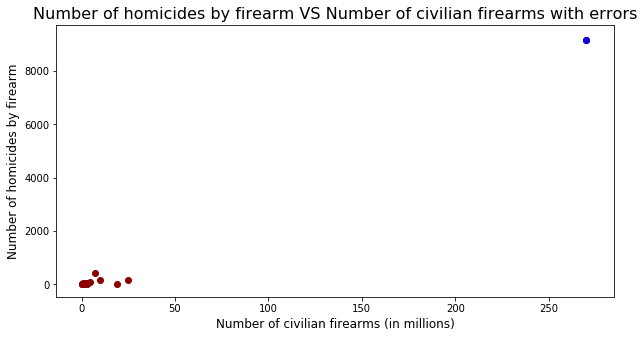

In [156]:
#plot with errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1000000, df_['Number of homicides by firearm'], c='darkred')
ax.errorbar(df_['Average total all civilian firearms'] / 1000000, df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0), fmt = '.', c='darkred')

scatter_usa = ax.scatter(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of homicides by firearm'], c='b')
ax.errorbar(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of homicides by firearm'], 
            yerr = np.sqrt(df_usa['Number of homicides by firearm'] * 1.0), fmt = '.', c='b')

ax.set_xlabel("Number of civilian firearms (in millions)", fontsize=12)
ax.set_ylabel("Number of homicides by firearm", fontsize=12)
ax.set_ylim()
pl.title('Number of homicides by firearm VS Number of civilian firearms with errors', fontsize=16)
pl.show()

Figure 5. number of homicides by firearm VS number of civilian firearms with errors.We can see the US in blue (again, it is an outlier). The US has both a very high number of homicides by year and a very high number of civilian firearms. 
- Here, even though we plot errors for the number of homicides by firearm, they are very small (almost invisible).

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


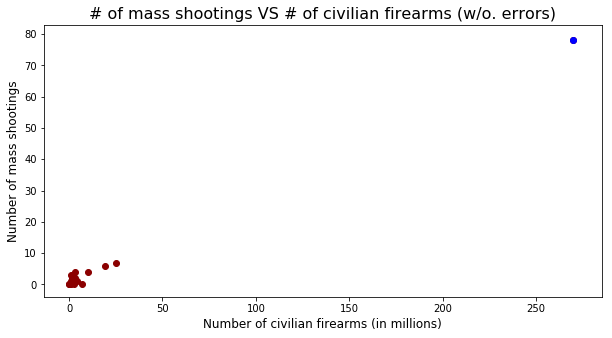

In [157]:
#plot without errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1000000, df_['Number of mass shootings'], c='darkred')
#ax.errorbar(df_['Average total all civilian firearms'] / 1000000, df_['Number of mass shootings'], 
#            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', c='darkred')

scatter_usa = ax.scatter(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of mass shootings'], c='b')
#ax.errorbar(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of mass shootings'], 
#            yerr = np.sqrt(df_usa['Number of mass shootings'] * 1.0), fmt = '.', c='b')

ax.set_xlabel("Number of civilian firearms (in millions)", fontsize=12)
ax.set_ylabel("Number of mass shootings", fontsize=12)
ax.set_ylim()
pl.title('# of mass shootings VS # of civilian firearms (w/o. errors)', fontsize=16)
pl.show()

Figure 8. # of mass shootings VS # of civilian firearms (w/o. errors)

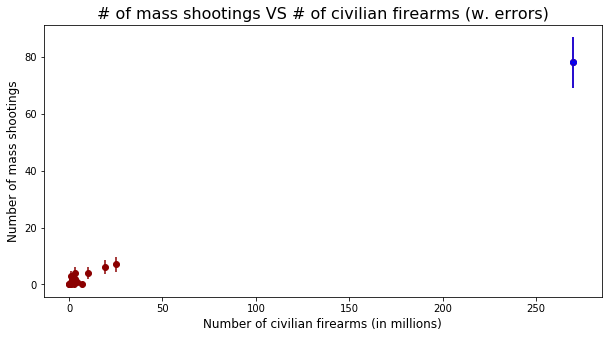

In [158]:
#plot with errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1000000, df_['Number of mass shootings'], c='darkred')
ax.errorbar(df_['Average total all civilian firearms'] / 1000000, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', c='darkred')

scatter_usa = ax.scatter(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of mass shootings'], c='b')
ax.errorbar(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of mass shootings'], 
            yerr = np.sqrt(df_usa['Number of mass shootings'] * 1.0), fmt = '.', c='b')

ax.set_xlabel("Number of civilian firearms (in millions)", fontsize=12)
ax.set_ylabel("Number of mass shootings", fontsize=12)
ax.set_ylim()
pl.title('# of mass shootings VS # of civilian firearms (w. errors)', fontsize=16)
pl.show()

Figure 7. # of mass shootings VS # of civilian firearms (w. errors)

- Again, the USA has much larger numbers for both Number of mass shootings and number of civilian firearms



# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [160]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3
df_['firearmspp'] = df_['Average total all civilian firearms'] / df_['pop']

In [165]:
firearmspp_mean = df_['firearmspp'].mean()
shootingspp_mean = df_['shootingspp'].mean()

In [166]:
df_['firearmspp_norm'] = df_['firearmspp'] / firearmspp_mean
df_['shootingspp_norm'] = df_['shootingspp'] / shootingspp_mean
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,gdp,pop,avg_civilian_firearms_pp,shootingspp,firearmspp,firearmspp_norm,shootingspp_norm
0,Australia,30.0,3050000.0,15.0,4,1.543411e+12,22742475.0,0.134110,0.000176,0.134110,0.593366,1.423355
1,Austria,18.0,2500000.0,30.4,1,4.094252e+11,8429991.0,0.296560,0.000119,0.296560,1.312121,0.959983
2,Belgium,70.0,1800000.0,17.2,2,4.978842e+11,11128246.0,0.161751,0.000180,0.161751,0.715660,1.454434
3,Canada,173.0,9950000.0,30.8,4,1.824289e+12,34750545.0,0.286326,0.000115,0.286326,1.266842,0.931514
4,Denmark,15.0,650000.0,12.0,0,3.271489e+11,5591572.0,0.116246,0.000000,0.116246,0.514328,0.000000


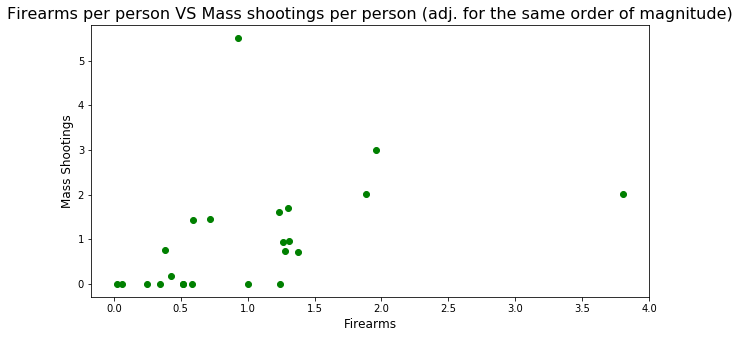

In [167]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmspp_norm'], df_['shootingspp_norm'], c='g')

ax.set_xlabel("Firearms", fontsize=12)
ax.set_ylabel("Mass Shootings", fontsize=12)
ax.set_ylim()
pl.title('Firearms per person VS Mass shootings per person (adj. for the same order of magnitude)', fontsize=16)
pl.show()

Figure 8: Firearms per person VS Mass shootings per person (adj. for the same order of magnitude)

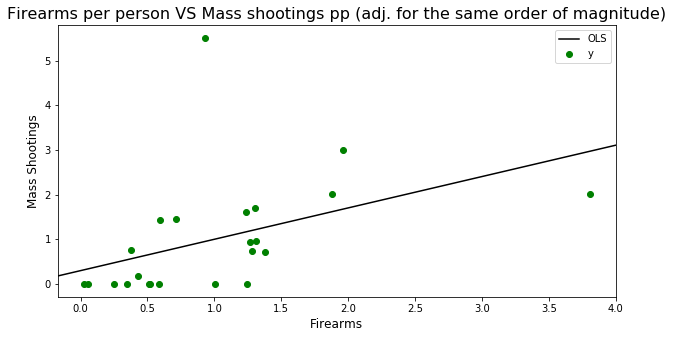

In [170]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmspp'] / firearmspp_mean,
                     df_['shootingspp'] / shootingspp_mean, c='g', label='y')

ols_model = smf.ols(formula = 'shootingspp_norm ~ firearmspp_norm', data=df_).fit()
abline_plot(model_results=ols_model, ax=ax, color='black', label='OLS')

ax.set_xlabel("Firearms", fontsize=12)
ax.set_ylabel("Mass Shootings", fontsize=12)
ax.set_ylim()
pl.title('Firearms per person VS Mass shootings pp (adj. for the same order of magnitude)', fontsize=16)
pl.legend()
pl.show()

Figure 9: Firearms per person VS Mass shootings pp (adj. for the same order of magnitude); OLS has been applied

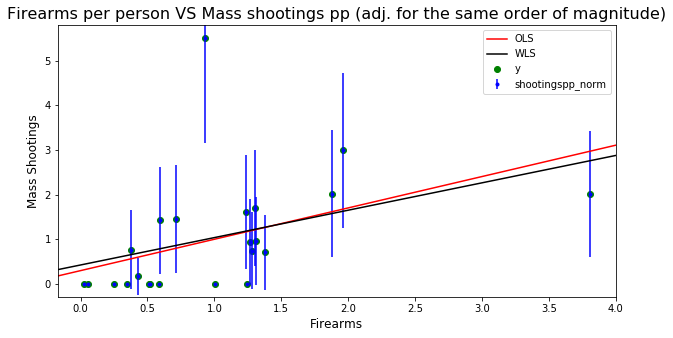

In [171]:
W = range(1,24)

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmspp'] / firearmspp_mean,
                     df_['shootingspp'] / shootingspp_mean, c='g', label='y')

ols_model = smf.ols(formula = 'shootingspp_norm ~ firearmspp_norm', data=df_).fit()
abline_plot(model_results=ols_model, ax=ax, color='red', label='OLS')

wls_model = smf.wls(formula = 'shootingspp_norm ~ firearmspp_norm', weights=W, data=df_).fit()
abline_plot(model_results=wls_model, ax=ax, color='black', label='WLS')

ax.errorbar(df_['firearmspp_norm'], df_['shootingspp_norm'], 
            yerr = np.sqrt(df_['shootingspp_norm'] * 1.0), fmt = '.', c='b')


ax.set_xlabel("Firearms", fontsize=12)
ax.set_ylabel("Mass Shootings", fontsize=12)
ax.set_ylim()
pl.title('Firearms per person VS Mass shootings pp (adj. for the same order of magnitude)', fontsize=16)
pl.legend()
pl.show()

Figure 10: various models like OLS and WLS applied to the data

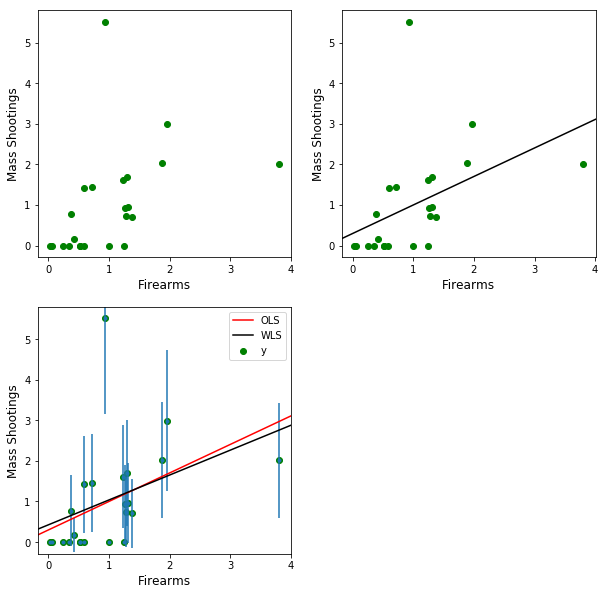

In [172]:
W = range(1,24)

fig = pl.figure(figsize=(10,10) )
ax1 = fig.add_subplot(221)
ax1.scatter(df_['firearmspp_norm'], df_['shootingspp_norm'], c='g')
ax1.set_xlabel("Firearms", fontsize=12)
ax1.set_ylabel("Mass Shootings", fontsize=12)
ax1.set_ylim()

ax2 = fig.add_subplot(222)
ax2.scatter(df_['firearmspp_norm'],
                     df_['shootingspp_norm'], c='g', label='y')

ols_model = smf.ols(formula = 'shootingspp_norm ~ firearmspp_norm', data=df_).fit()
abline_plot(model_results=ols_model, ax=ax2, color='black', label='OLS')
ax2.set_xlabel("Firearms", fontsize=12)
ax2.set_ylabel("Mass Shootings", fontsize=12)
ax2.set_ylim()


ax3 = fig.add_subplot(223)
ax3.scatter(df_['firearmspp_norm'],
                     df_['shootingspp_norm'], c='g', label='y')

ols_model = smf.ols(formula = 'shootingspp_norm ~ firearmspp_norm', data=df_).fit()
abline_plot(model_results=ols_model, ax=ax3, color='red', label='OLS')
wls_model = smf.wls(formula = 'shootingspp_norm ~ firearmspp_norm', weights=W, data=df_).fit()
abline_plot(model_results=wls_model, ax=ax3, color='black', label='WLS')

ax3.errorbar(df_['firearmspp_norm'], df_['shootingspp_norm'], 
            yerr = np.sqrt(df_['shootingspp_norm'] * 1.0), fmt = '.', label=None)

ax3.set_xlabel("Firearms", fontsize=12)
ax3.set_ylabel("Mass Shootings", fontsize=12)
ax3.set_ylim()

#pl.title('Firearms per person VS Mass shootings pp (adj. for the same order of magnitude)', fontsize=16)
pl.legend()
pl.show()





Figure 11: All 3 combined

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



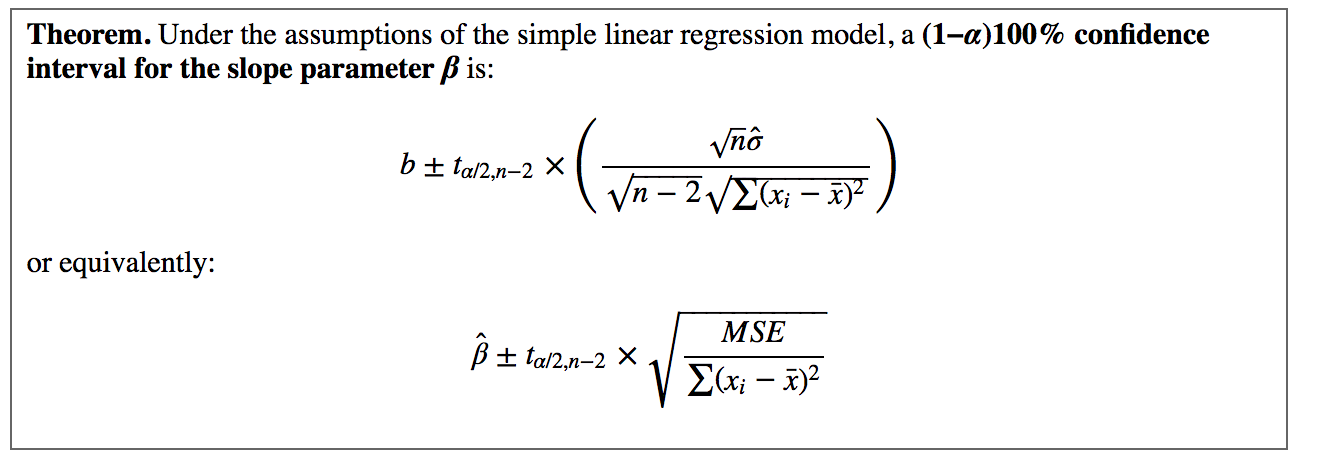

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

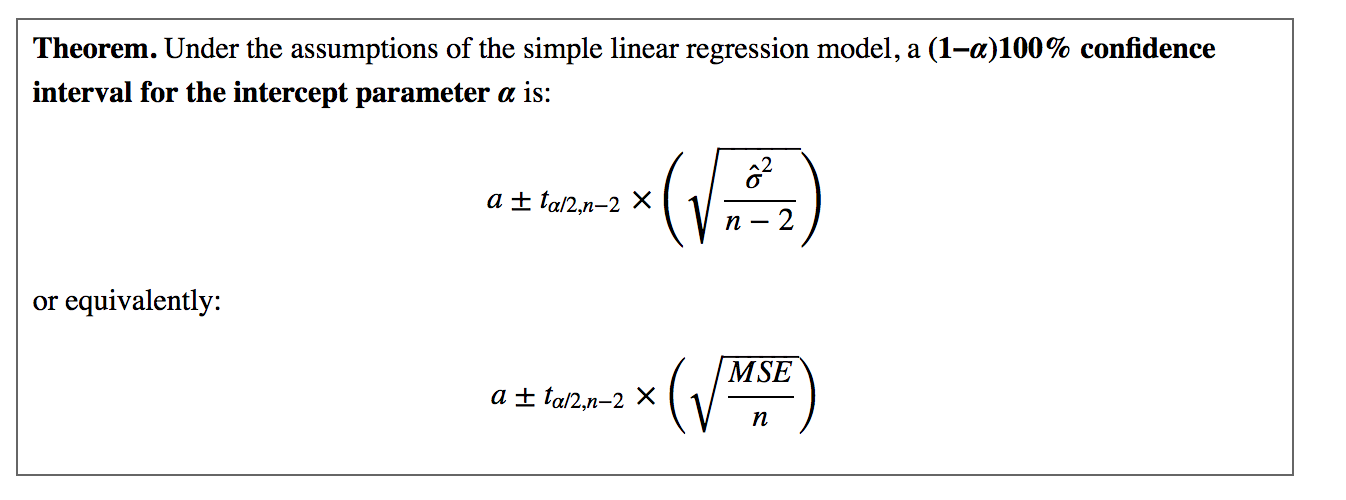

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

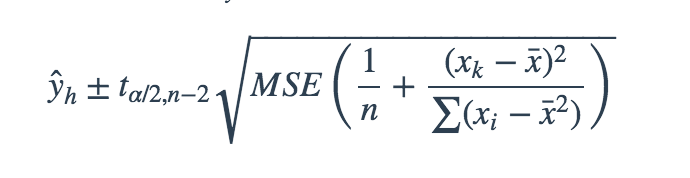

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

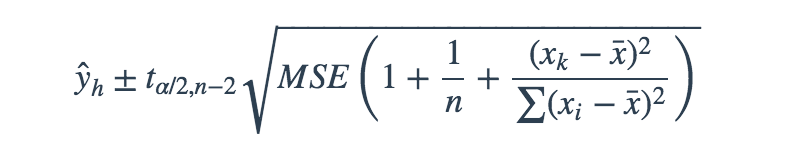

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

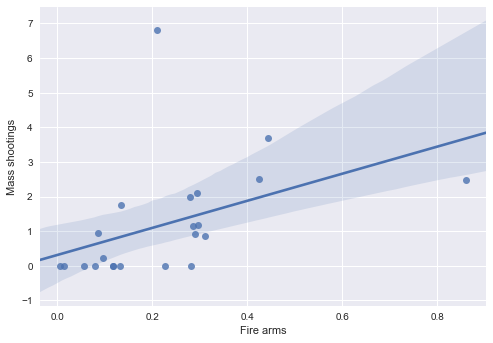

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

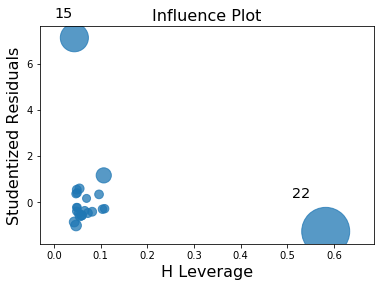

In [173]:
sm.graphics.influence_plot(ols_model, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings